In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
path = "../../../resource"
img1 = cv2.imread(f"{path}/dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread(f"{path}/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (600,600))

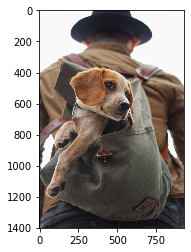

In [10]:
plt.imshow(img1)

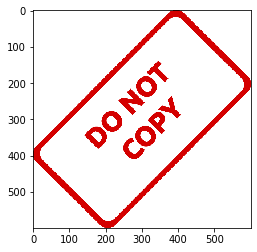

In [11]:
plt.imshow(img2)

In [13]:
print(img1.shape)
print(img2.shape)

(1401, 934, 3)
(600, 600, 3)


In [14]:
x_offset = img1.shape[1] - 600
y_offset = img1.shape[0] - 600

In [15]:
rows, columns, channel = img2.shape

In [17]:
roi = img1[y_offset:1401, x_offset:934, ]

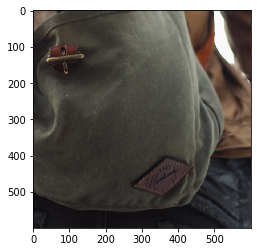

In [18]:
plt.imshow(roi)

In [21]:
img_grey = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

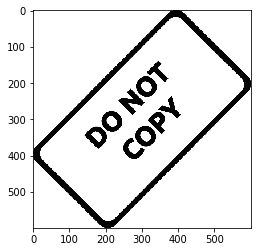

In [25]:
plt.imshow(img_grey, cmap='gray')

(600, 600)

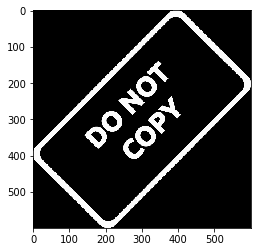

In [40]:
msk_inverse = cv2.bitwise_not(img_grey)
plt.imshow(msk_inverse, cmap='gray')
msk_inverse.shape

In [38]:
import numpy as np
white_bkg = np.full(img2.shape, 255, dtype=np.int16)
# plt.imshow(white_bkg, cmap='gray')
white_bkg.shape

(600, 600, 3)

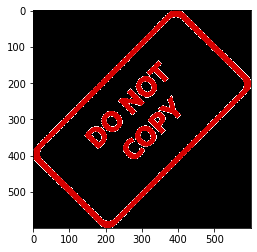

In [50]:
fg = cv2.bitwise_or(img2, img2, mask=msk_inverse)
plt.imshow(fg)

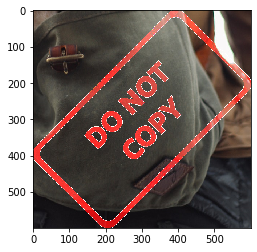

In [55]:
final_img = cv2.bitwise_or(roi, fg)
plt.imshow(final_img)

In [58]:
large_img = img1
small_img = final_img

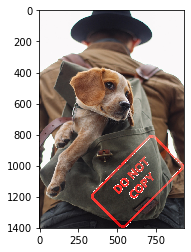

In [61]:
large_img[y_offset:y_offset + small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)